# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [3]:
from src.data.unified_dataloader import load_dataset

a, processed_default_credit = load_dataset('default_credit')
# _, processed_uci = load_dataset('uci')

In [4]:
processed_default_credit.head(3)

,LIMIT_BAL,sex,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default_payment_next_month
0,-1.136720,0,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,0,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,...,0,0,1,0,0,0,0,0,0,1
2,-0.597202,0,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,...,0,1,0,0,0,0,0,0,0,0


### 3. Split label/unlabel data, split train/test data.

In [5]:
'''UCI dataset'''
# df = processed_uci.copy()
# X = df.drop('income', axis=1)
# y = df['income']

'''German Credit dataset'''
df = processed_default_credit.copy()
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']


In [6]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='default_credit', fairshap_base='DR')

-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the default_credit dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (11469, 90)
X_train_majority_label1 shape: (3033, 90)
X_train_minority_label0 shape: (7232, 90)
X_train_minority_label1 shape: (2266, 90)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据


/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 51
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据
4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 36
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改87个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results/default_credit/fairSHAP-DR_1-fold_results.csv
-------------------------------------
-------------2th fold----------------
-------------------------------------
1. Split the default_credit dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 a

/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 40
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改95个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results/default_credit/fairSHAP-DR_4-fold_results.csv
-------------------------------------
-------------5th fold----------------
-------------------------------------
1. Split the default_credit dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (11462, 90)
X_train_majority_label1 shape: (3044, 90)
X_train_minority_label0 shape: (7194, 90)
X_train_minority_label1 shape: (2300, 90)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 

/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py

4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据


/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 31
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据


/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/zhome/21/8/202236/miniconda3/envs/rai_fairness/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py

5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 26
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改57个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results/default_credit/fairSHAP-DR_5-fold_results.csv


### 4. read saved_csv file and make plots --- 2025/3/10 FairSHAP(DR), threshold=0.1

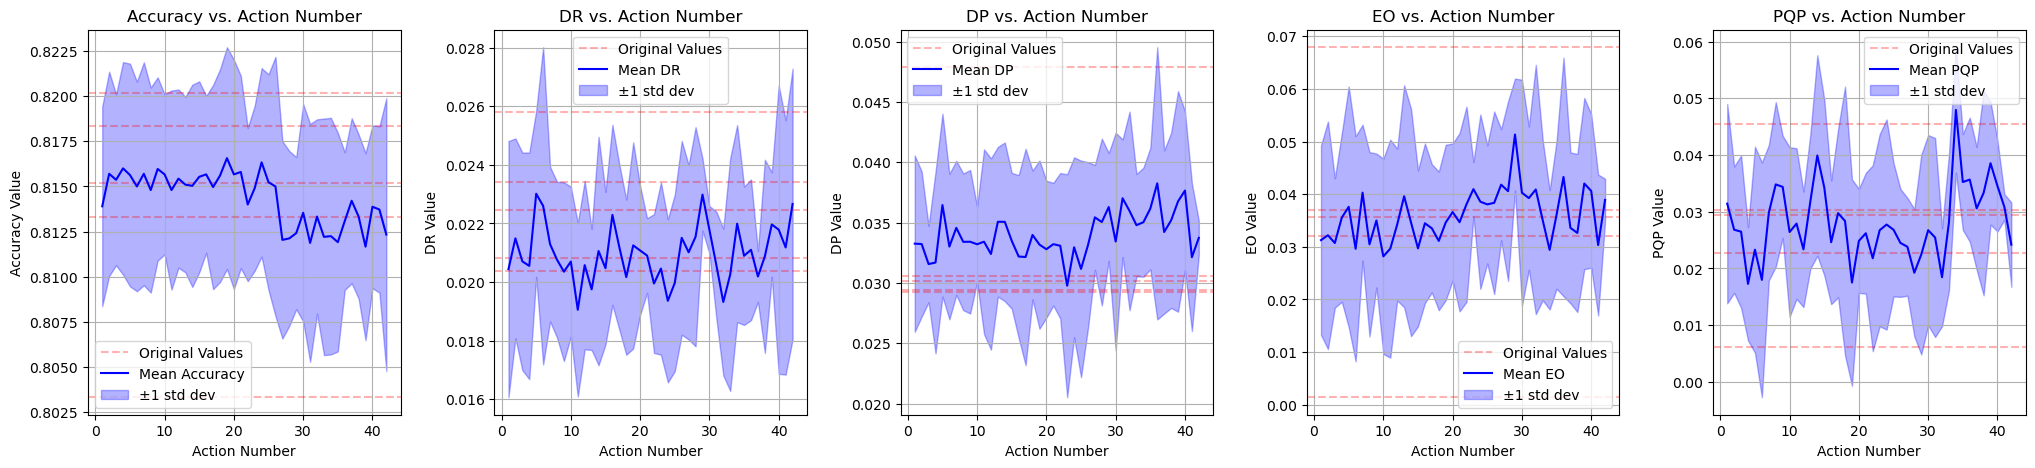

In [3]:
import pandas as pd
import numpy as np
from src.visualization.visualization2 import plot_results

def extract_original_values(fold):
    original_accuracy = fold.loc[0, 'new_accuracy']
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    # original_recall = fold.loc[0, 'new_recall']
    # original_precision = fold.loc[0, 'new_precision']
    # original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_accuracy, original_DR, original_DP, original_EO, original_PQP

# fold1 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_5-fold_results.csv')
fold1 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_OT_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_OT_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_OT_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_OT_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/default_credit/fairSHAP-DR_OT_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_accuracy = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_drs = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_dps = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_eos = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_pqps = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
# original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

# 调用函数
plot_results(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=None,
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3  # 红线透明度
)

In [4]:
fold_last_rows = [
    fold1.iloc[-1], 
    fold2.iloc[-1], 
    fold3.iloc[-1], 
    fold4.iloc[-1], 
    fold5.iloc[-1]
]

# 转换为 DataFrame 以便计算均值和标准差
df_last_rows = pd.DataFrame(fold_last_rows)

# 计算每列的 mean 和 std
mean_values = df_last_rows.mean()
std_values = df_last_rows.std()

# 组合成新的 DataFrame，显示 "mean ± std" 形式
result_df = pd.DataFrame({
    "Mean": mean_values,
    "Std": std_values,
    "Mean ± Std": mean_values.round(4).astype(str) + " ± " + std_values.round(4).astype(str)
})
result_df

,Mean,Std,Mean ± Std
action_number,54.200000,29.482198,54.2 ± 29.4822
new_accuracy,0.816800,0.007117,0.8168 ± 0.0071
new_DR,0.021637,0.004327,0.0216 ± 0.0043
new_DP,0.031805,0.009621,0.0318 ± 0.0096
new_EO,0.035876,0.016151,0.0359 ± 0.0162
new_PQP,0.021059,0.011964,0.0211 ± 0.012


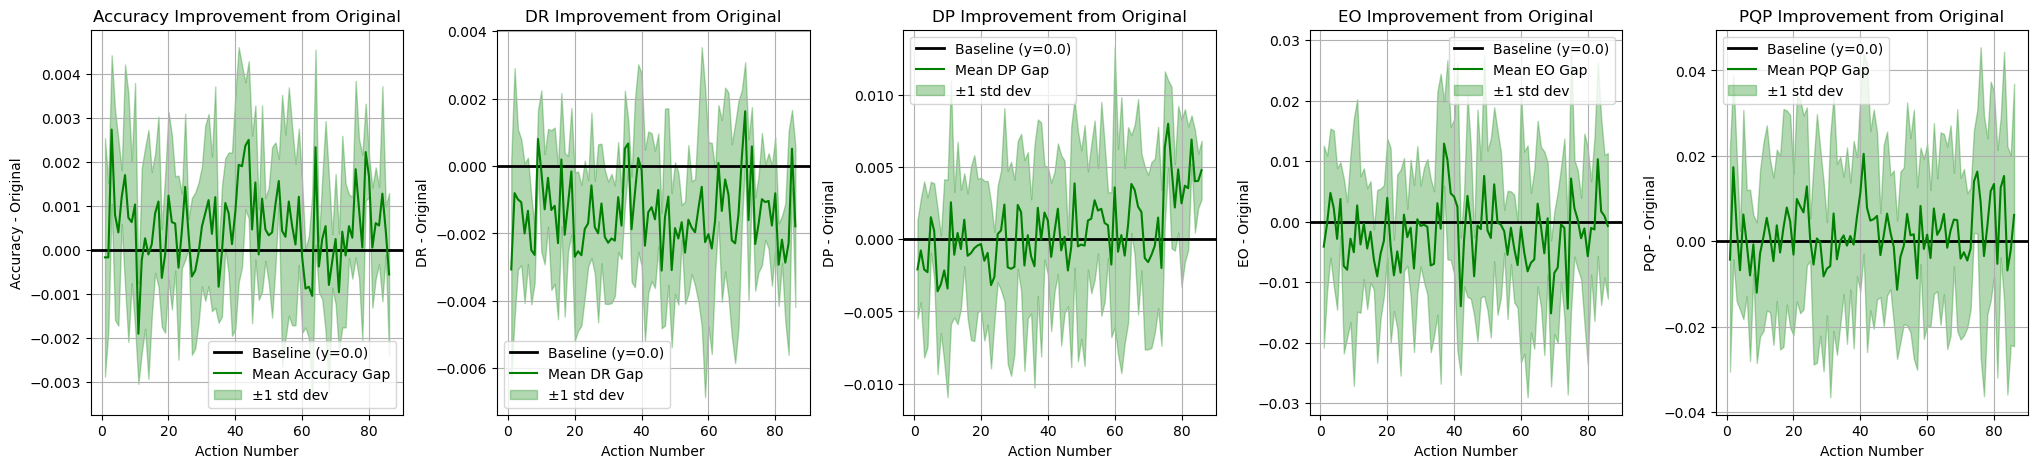

In [3]:
from src.visualization.visualization1 import plot_fairness_improvement

plot_fairness_improvement(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  # 当有 3 个 fold 无数据时停止
    min_action=1,
    baseline=0.0,
    figsize=None,
    fill_alpha=0.3,
    fill_color='g'
)

#### 4.1 直接plot_results

In [ ]:
from src.visualization.visualization2 import plot_results

# 调用函数
plot_results(
    folds=folds,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=(10, 6),
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3  # 红线透明度
)

#### 4.2 画图每个fold相对自己original value的提升

In [ ]:
from src.visualization.visualization1 import plot_fairness_improvement


plot_fairness_improvement(
    folds=folds,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  # 当有 3 个 fold 无数据时停止
    min_action=1,
    baseline=0.0,
    figsize=(10, 6),
    fill_alpha=0.3,
    fill_color='g'
)

-------------------------------------------------------------

### 4.3 DP

In [ ]:
import pandas as pd
import numpy as np

def extract_original_values(fold):
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    original_recall = fold.loc[0, 'new_recall']
    original_precision = fold.loc[0, 'new_precision']
    original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_DR, original_DP, original_EO, original_PQP, original_recall, original_precision, original_sufficiency

fold1 = pd.read_csv('saved_results/german_credit/fairSHAP-DP_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/german_credit/fairSHAP-DP_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/german_credit/fairSHAP-DP_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/german_credit/fairSHAP-DP_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/german_credit/fairSHAP-DP_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_drs = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_dps = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_eos = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_pqps = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

In [ ]:
from src.visualization.viz3 import plot_fairness_improvement
# 调用函数
plot_fairness_improvement(
    folds=folds,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    original_recall=original_recalls,
    original_precision=original_precisions,
    original_sufficiency=original_sufficiencies,
    stop_when_no_data=3,
    min_action=1,
    figsize=(12, 8),
    fill_alpha=0.3,
    fill_color='g',
    # red_alpha=0.3  # 红线透明度
)

### 4.3 EO

In [ ]:
import pandas as pd
import numpy as np

def extract_original_values(fold):
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    original_recall = fold.loc[0, 'new_recall']
    original_precision = fold.loc[0, 'new_precision']
    original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_DR, original_DP, original_EO, original_PQP, original_recall, original_precision, original_sufficiency

fold1 = pd.read_csv('saved_results/german_credit/fairSHAP-EO_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/german_credit/fairSHAP-EO_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/german_credit/fairSHAP-EO_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/german_credit/fairSHAP-EO_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/german_credit/fairSHAP-EO_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_drs = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_dps = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_eos = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_pqps = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]


from src.visualization.viz3 import plot_fairness_improvement
# 调用函数
plot_fairness_improvement(
    folds=folds,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    original_recall=original_recalls,
    original_precision=original_precisions,
    original_sufficiency=original_sufficiencies,
    stop_when_no_data=3,
    min_action=1,
    figsize=(12, 8),
    fill_alpha=0.3,
    fill_color='g',

)
